In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyextremes import EVA

print("Todos los paquetes importados correctamente")


Todos los paquetes importados correctamente


In [2]:
station = 1330
# We create some random continuous time series with some extremes
flowdata = pd.read_csv(f"../../../Status_Outlook_Bulletin/stations/data/{station}.csv",parse_dates=['Fecha'],index_col="Fecha",dayfirst=True,na_values="NA")
# Convertir el índice a datetime por si acaso
flowdata.index = pd.to_datetime(flowdata.index, dayfirst=True)
diff = pd.date_range(start = flowdata.index[0].strftime('%Y-%m-%d'), end = flowdata.index[-1].strftime('%Y-%m-%d'),freq='D')
# Re-index the dataframe based on the missind date variable
flowdata = flowdata.reindex(diff,fill_value=None)
# Set index Fecha
flowdata.index.name = 'Fecha'
flowdata = flowdata.rename_axis("date")
# Change columns names
flowdata.columns = ['flow']

#month and year column
flowdata['month'] = flowdata.index.month
flowdata['year'] = flowdata.index.year
flowdata = flowdata.reset_index()

#check whether or not there is enough data? 
print(station)
print(f"There are {flowdata['year'].max() - flowdata['year'].min()} years of data in this file.")
print(f"There are {sum(flowdata['flow'].isnull())} missing data points, which is {np.round(sum(flowdata['flow'].isnull())/len(flowdata) * 100,2)}% of the total data")

1330
There are 45 years of data in this file.
There are 1427 missing data points, which is 8.6% of the total data


In [3]:
flowdata.set_index('date', inplace=True)
# Create a time series (removing missing values in 'flow' column)
flowdata_ts = flowdata['flow'].dropna()
# Display the result
print(flowdata_ts)

date
1980-01-01     1.956
1980-01-02     1.956
1980-01-03     1.956
1980-01-04     1.956
1980-01-05     1.956
               ...  
2025-05-27    12.367
2025-05-28    12.106
2025-05-29    22.766
2025-05-30    63.905
2025-05-31    76.053
Name: flow, Length: 15161, dtype: float64


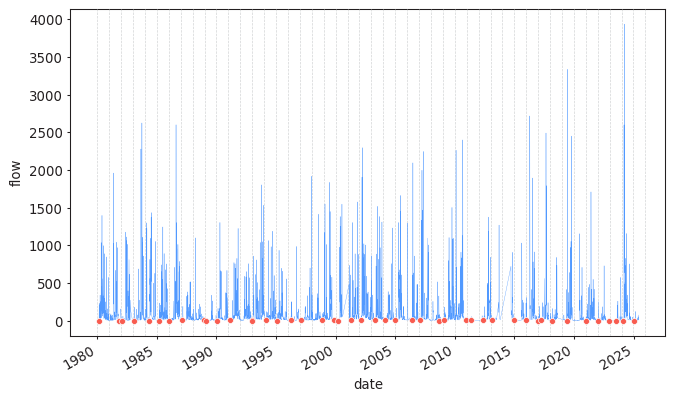

In [4]:
from pyextremes import get_extremes
from pyextremes.plotting import plot_extremes

extremes = get_extremes(
    ts=flowdata_ts,
    method="BM",
    extremes_type="low",
)
plot_extremes(
    ts=flowdata_ts,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
);

In [5]:
extremes.sort_values().head(6)

date
2023-07-29    0.248
1980-02-13    0.666
1981-10-30    1.186
1982-01-21    1.186
2019-05-19    1.395
2020-12-25    1.397
Name: flow, dtype: float64

In [6]:
model = EVA(flowdata_ts)

In [7]:
model.get_extremes(
    method="BM",
    extremes_type="low",
)

In [8]:
model.fit_model()
summary = model.get_summary(
    return_period=[2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
print(summary)

               return value  lower ci  upper ci
return period                                  
2.0                3.745825  4.468359  2.945674
5.0                1.850529  2.557671  1.333554
10.0               1.184203  1.887811  0.802633
25.0               0.699941  1.489430  0.460663
50.0               0.492848  1.321559  0.307524
100.0              0.363268  1.239976  0.098358
250.0              0.262438  1.197834 -0.133006
500.0              0.217963  1.190980 -0.253803
1000.0             0.189817  1.188352 -0.348573


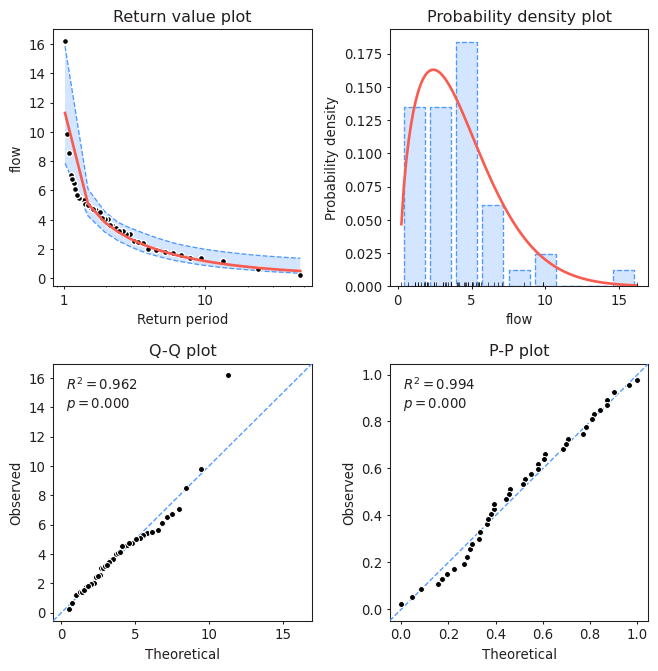

In [9]:
model.plot_diagnostic(alpha=0.95);
plt.show()

In [10]:
from pyextremes import get_return_periods

return_periods = get_return_periods(
    ts=flowdata_ts,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="low",
    block_size="365.2425D",
    return_period_size="365.2425D",
    plotting_position="weibull",        # other option: "Cunnane", "median", "Gringorten"
)
return_periods.sort_values("return period", ascending=False).head(12).round(2)

,flow,exceedance probability,return period
date,,,
2023-07-29,0.25,0.02,47.00
1980-02-13,0.67,0.04,23.50
1981-10-30,1.19,0.07,13.43
1982-01-21,1.19,0.07,13.43
2019-05-19,1.40,0.11,9.40
2020-12-25,1.40,0.13,7.83
2024-02-06,1.57,0.15,6.71
2022-12-19,1.75,0.17,5.88
2025-01-10,1.82,0.19,5.22
